### **Gem Stone Analysis:**



**Author:** Suryajiraje Bhosale



**Email:** suryajirajebhosale@gmail.com



**Client | Purpose:** NatWest Group | Assignment


**Dataset:** Cubic Zirconia


**Graphic:** Cubic Zirconia

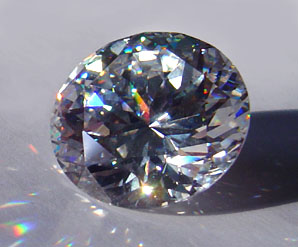


#### **Objectives:**

1. Perform explanatory data analysis 
2. Univariate and multivariate analysis.


**Table Of Contents:**

1. Importing Packages
2. Importing Data Dictionary
3. Importing Dataset
4. EDA101: Data Treatment
5. EDA102: Descriptive Statistics & Correlation Metrics
6. EDA103: Univariate Data Visualisation
7. EDA104: Multivariate Data Visualisation

-----

**Importing all required packages and their dependencies for objective completion:**

**Packages:** 

1. Pandas 
2. Numpy
3. Matplotlib
4. Seaborn
5. Warnings

In [864]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing Data Dictionary.xslx to assess the variables and their descriptions:** 

In [865]:
info = pd.read_excel('/Users/suryabhosale/Desktop/Data Dictionary.xlsx', engine = 'openpyxl')
pd.options.display.max_colwidth = 200
info.dropna(inplace = True)
info

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,"Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal."
2,Color,Colour of the cubic zirconia.With D being the best and J the worst.
3,Clarity,"cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3"
4,Depth,"The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter."
5,Table,The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


**Importing dataset Cubuic_Zirconia:**

In [866]:
df = pd.read_csv('/Users/suryabhosale/Desktop/cubic_zirconia.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


**EDA101:** Data Treatment

In [867]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [868]:
df.shape

(26967, 10)

In [869]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [870]:
df.duplicated().sum()

34

**The above information depicts that there are:**
1. 10 Variables (9 Explanatory, 1 Explained)
2. The are 26967 datapoints in total in the orignal dataset
3. Only Depth has 697 missing/null values
4. There are 34 instances of potential duplicated entries in the dataset

--------------

**Treatment of missing and duplicate datapoints:**

**Replacing all null values in the depth variable by the its mean:**

In [871]:
df.depth.fillna(df.depth.mean(), inplace = True)
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**Deleting all duplicate datapoints except the the first occurance:**

In [872]:
df.drop_duplicates(keep = 'first', inplace = True)

In [873]:
df.duplicated().sum()

0

------

**EDA102:** Descriptive Statistics & Correlation

**Descriptive Statistics**

In [874]:
df.describe().round(2)

,carat,depth,table,x,y,z,price
count,26933.00,26933.00,26933.00,26933.00,26933.00,26933.00,26933.00
mean,0.80,61.75,57.46,5.73,5.73,3.54,3937.53
std,0.48,1.39,2.23,1.13,1.17,0.72,4022.55
min,0.20,50.80,49.00,0.00,0.00,0.00,326.00
25%,0.40,61.10,56.00,4.71,4.71,2.90,945.00
50%,0.70,61.80,57.00,5.69,5.70,3.52,2375.00
75%,1.05,62.50,59.00,6.55,6.54,4.04,5356.00
max,4.50,73.60,79.00,10.23,58.90,31.80,18818.00


In [875]:
for i in df.columns[1:4]:
        print(i,':')
        print(df[i].unique(), '\n')

cut :
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair'] 

color :
['E' 'G' 'F' 'D' 'H' 'J' 'I'] 

clarity :
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1'] 



**Operations:**

1. The descriptive statistics for each variable have been displayed.
2. Unique values for categorical variables have been identified.
    
        a. Clarity has 11 unique values as per the data dictionary documentation, however only 8 unique values are                     present  in the dataset.
        b. All unique values for color and cut are present in the dataset.

--------

**Correlation**

<AxesSubplot:>

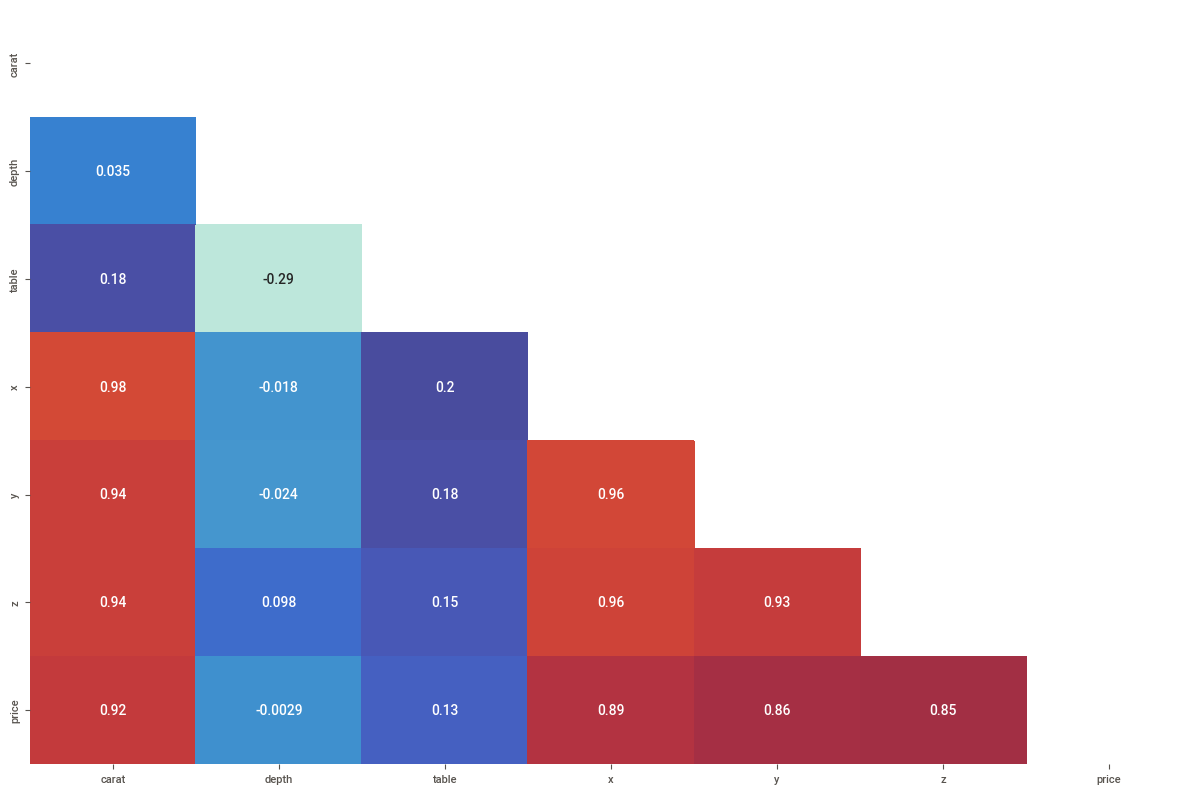

In [876]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
corr_heat = sns.heatmap(df.corr(), annot = True, mask =  mask, center = 0.5, cbar=False)
corr_heat

In [877]:
corr_df = df.corr().round(3)
corr_df = pd.DataFrame(np.tril(corr_df.values), index= corr_df.index, columns = corr_df.columns)
corr_df = corr_df.iloc[:,:-1]
corr_df.drop(corr_df.head(1).index, inplace=True)
corr_df.replace(to_replace=[0,1], value='', inplace=True)
for i in corr_df.columns:
     corr_df[i] = pd.to_numeric(corr_df[i], errors = 'coerce')
corr_df.style.applymap(lambda x: 'background-color : yellow' if (x > 0.80) & (x != 1) else '')

,carat,depth,table,x,y,z
depth,0.035000,nan,nan,nan,nan,nan
table,0.182000,-0.294000,nan,nan,nan,nan
x,0.977000,-0.018000,0.196000,nan,nan,nan
y,0.941000,-0.024000,0.182000,0.963000,nan,nan
z,0.941000,0.098000,0.149000,0.956000,0.929000,nan
price,0.922000,-0.003000,0.127000,0.887000,0.856000,0.851000


In [878]:
high_corrs = {}
for i in corr_df.columns:
    high_corrs[i] = []
high_corrs

{'carat': [], 'depth': [], 'table': [], 'x': [], 'y': [], 'z': []}

In [879]:
hi_cor = []
for i in corr_df.values:
    for j in range(len(corr_df.columns)):
        if (i[j] > 0.8):
            hi_cor.append(i[j])

In [880]:
for i in corr_df.columns:
    for j in hi_cor:
        if j in corr_df[i].to_list():
              high_corrs[i].append(corr_df.index[corr_df[i] == j][0])    

In [881]:
high_corrs.pop('depth');high_corrs.pop('table')
high_corrs

{'carat': ['x', 'y', 'y', 'price'],
 'x': ['y', 'z', 'price'],
 'y': ['z', 'price'],
 'z': ['price']}

**Operations:**

Heatmap of correlation matrix to identify and assess prevalance of multicollinearity.

Post initial investigation there are only high correlations in the dataset that are positive in nature. 
    
    Carat : x, y, z, price
    
    x : y, z, price
    
    y : z, price
    
    z : price

**EDA103:** Univariate Data Visualisation 

**DVU101:**

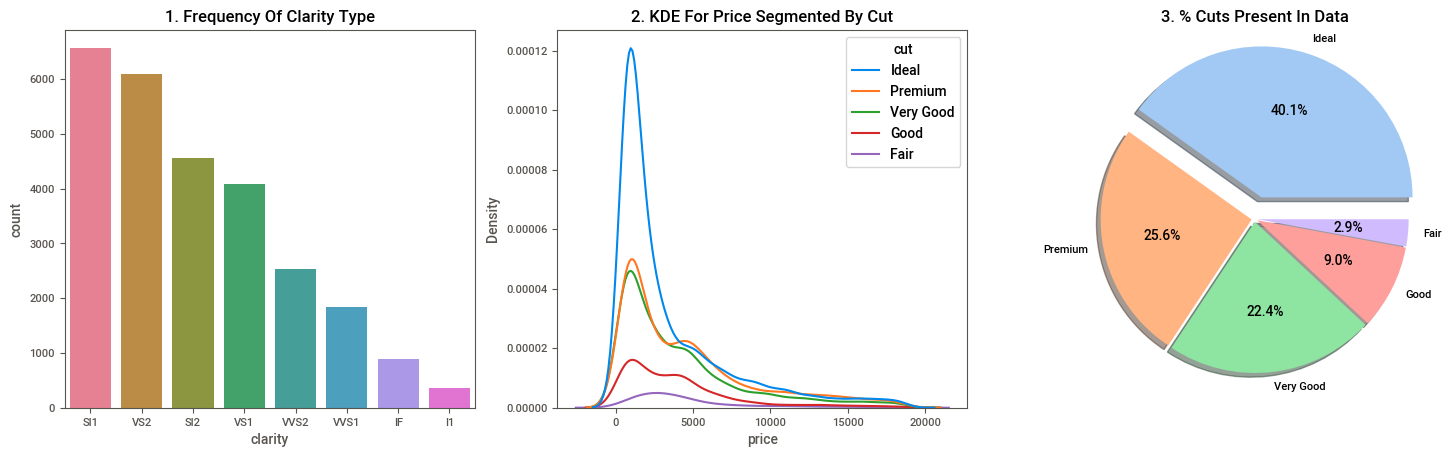

In [882]:
fig = plt.figure(figsize=(18,5))
plt.subplot(131)
plt.title('1. Frequency Of Clarity Type')
sns.countplot(df.clarity, palette="husl", order = df.clarity.value_counts().index)
plt.subplot(132)
plt.title('2. KDE For Price Segmented By Cut')
sns.kdeplot(df.price, hue = df.cut)
cut_labels = df.cut.unique()
counts = df.cut.value_counts()
plt.subplot(133)
explode = [0.15,0.02,0.02,0.02,0.02]
plt.title('3. % Cuts Present In Data')
colors = sns.color_palette('pastel')[0:5]
plt.pie(counts, labels=cut_labels, autopct='%1.1f%%', shadow=True, colors = colors, explode = explode)
plt.tight_layout
plt.show()

**Inference DVU101:**

    1. It depicts the frequency of clarity type in the dataset  with SI1 being the most frequent and I1 being the least frequent of the 8 that are present in the dataset. SI1 is the 5th least best clarity type with 6565 datapoints attributed to it and the least occuring is I1 with 364 data point attribution. The best of clarity is of IF which has only 891 data point attributions to it.  
    
    2. KDE of price hued over the type of cut reveals information about the probability density of the price ranges of different cuts. The cut with the highest probability density is reached achieved by ideal and least by the fair cut category. This gives us a better undersanding about the distrubtion of the cuts in the entire dataset. We can infer from the visual that Ideal is the most prevalent and the prevalance decreases by cuts as shown in the legend. 
    
    3. To determine how much percentage of the dataset is dominated by which type of cut a piechart rendered. This further confirms the the probability distribution in the KDEPlot being in sync with the data rendered by the pie chart visualisation.


**DVU102 :**

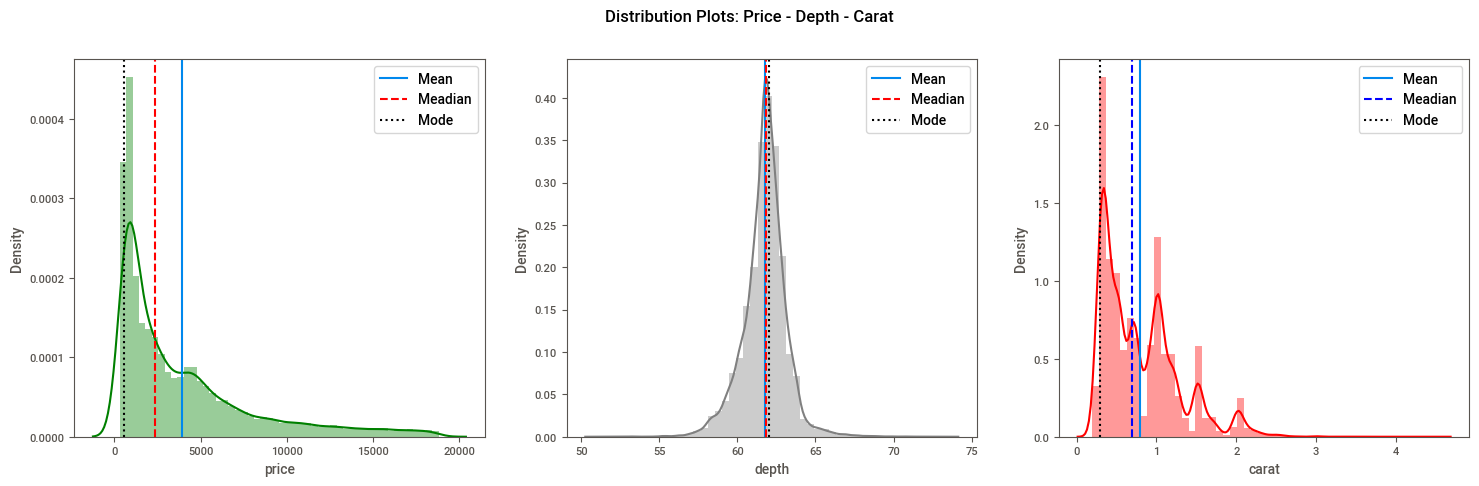

In [883]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.distplot(df.price, color = 'green')
plt.axvline(df.price.mean(), label = 'Mean')
plt.axvline(df.price.median(), label = 'Meadian', color = 'red', linestyle = '--')
plt.axvline(df.price.mode()[0], label = 'Mode', color = 'black', linestyle = ':')
plt.legend()
plt.subplot(132)
sns.distplot(df.depth, color = 'gray')
plt.axvline(df.depth.mean(), label = 'Mean')
plt.axvline(df.depth.median(), label = 'Meadian', color = 'red', linestyle = '--')
plt.axvline(df.depth.mode()[0], label = 'Mode', color = 'black', linestyle = ':')
plt.legend()
plt.subplot(133)
sns.distplot(df.carat, color = 'red')
plt.axvline(df.carat.mean(), label = 'Mean')
plt.axvline(df.carat.median(), label = 'Meadian', color = 'blue', linestyle = '--')
plt.axvline(df.carat.mode()[0], label = 'Mode', color = 'black', linestyle = ':')
plt.legend()
plt.suptitle('Distribution Plots: Price - Depth - Carat')
plt.show()

**Inference DVU102:**

    1. In DV102 we have created plots that depict the distribution of a few of the continous variables in the dataset. Price has and carat share right skewedness in their distribution with price depicting a higher degree of skewedness than carat. This can be deduced by the difference between alignment of the respective variables mean, media, and mode, where mean > median > mode. 
    
    2.The depth variable shows an almost perfect bell shaped symmetry in its distribution with mean = mode = median aligned closesly together.

**DVU103:**

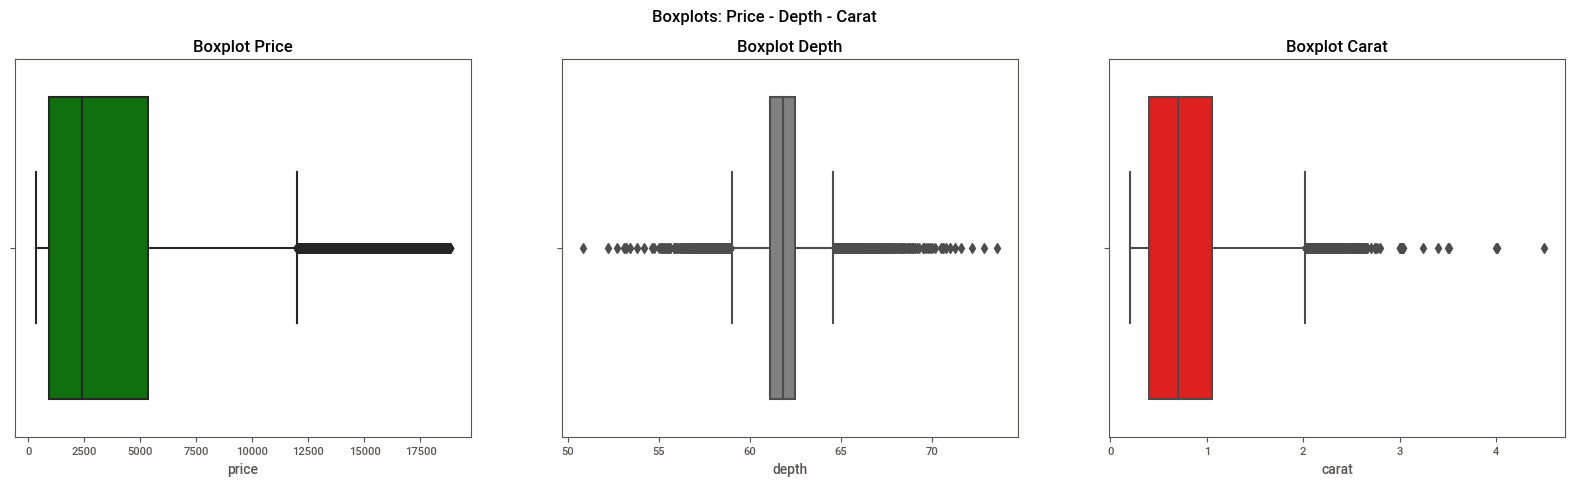

In [884]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.boxplot(df.price, color = 'green')
plt.title('Boxplot Price')
plt.subplot(132)
sns.boxplot(df.depth, color = 'gray')
plt.title('Boxplot Depth')
plt.subplot(133)
sns.boxplot(df.carat, color = 'red')
plt.title('Boxplot Carat')
plt.suptitle('Boxplots: Price - Depth - Carat')
plt.show()

**Inference DVU103:**

    1. The agenda of rendering boxplots for the same variables as in DV102 is to understand the layout of the outliers detectable  by the naked eye of the examiner. We can see extreme positive outliers placed beyond the limits of right upper whisker limits. For depth there are a considerable amount of datapoints on either side of the upper and lower whisker limits respectively. The boxplot for carat is similar in nature to that of price, and has datapoints only beyond the upper whisker limits. 
    
    2. The similarity in the visual aesthetics of price and carat for both DV102 and DV103 are also a testament to how intricitely outliers affect skewness and the alignment of the measures of central tendency.

------------

**EDA104:** Multivariate Data Visualisation

**DVM101:**

In [885]:
cla_cut = df.groupby(['clarity', 'cut']).size().reset_index(name = 'counts')
cla_cut_dict = {}
for i in cla_cut.clarity.unique():
    cla_cut_dict[i] = []
for i in cla_cut.clarity.unique():
    cla_cut_dict[i].append(cla_cut[cla_cut.clarity == i])

In [886]:
for i in keys:
    cla_cut_dict[i][0].drop('clarity', axis = 1, inplace = True)
    cla_cut_dict[i][0].set_index('cut', inplace = True)

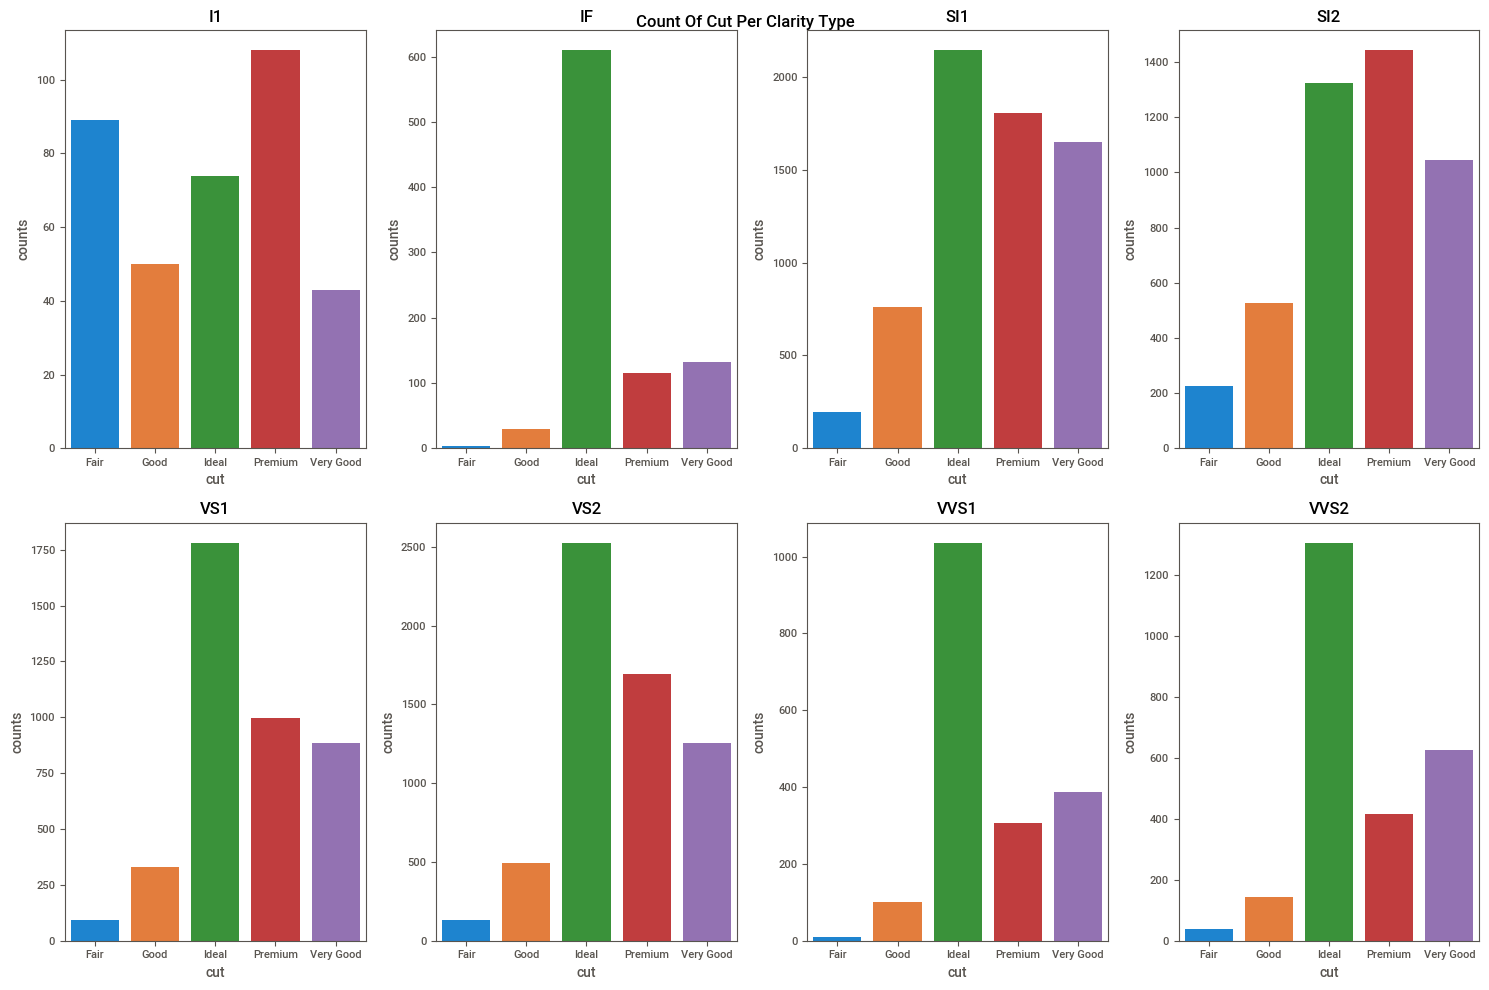

In [887]:
keys = [i for i in cla_cut_dict.keys()]
plt.figure(figsize=(15,10))
for j, i in enumerate(keys, 1):
    plt.subplot(2,4,j)
    sns.barplot(cla_cut_dict[i][0].index, cla_cut_dict[i][0].counts)
    plt.title(i)
plt.tight_layout()
plt.suptitle('Count Of Cut Per Clarity Type')
plt.show()

**Operations DVM101:**

    1. Grouping by cut and clarity to further the unique values clarity to create a dictionary to with these unique values as keys and subsequently appending individual clarity points to each of these lists to create a comprehensive key value pair framework where keys are clarity points and values are their correspoding cut type distributions.
    
    2. Further cleaning the dictionary values by dropping the clarity column to retrieve only the cut types per clarity key and their counts.
    
    3. Visualizing the the results of the operations carried out in 1. and 2.
    

**Inference DVM101:**
    
    1. Cut type Ideal is the most prevalent cut type across all clarity types apart from clarity type I1 and SI2, in these clarity types premium is most prevalent. Furthermore the consistently high prevelance of Ideal cut type is cordinated by its univariate pie chart rendered in DVU101.
    
    2. The least prevelant cut type across all clarity types is Fair, which is the least desirable cut type. Its prevelance is highest in the clarity type I1 which is the third least desirable clarity type. Its presence is minor in clarity type IF which is the second best clarity type as per Data Dictionary description, and is the best clarity type in the dataset as FL (Flawless) isnt present in the current dataset.
    
    3. It is also interesting to note that I1, which is the best clarity type in the dataset, also has the highest percentage of Ideal cut types to Total I1 arrtibutions, which is the best cut type as per the description.

**DVM102:**

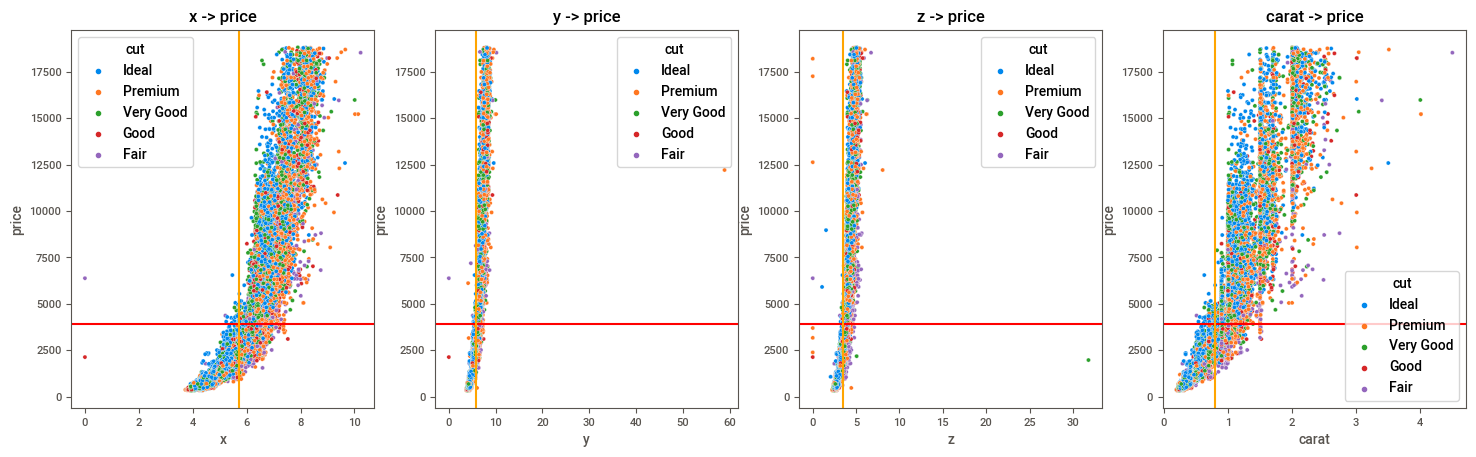

In [896]:
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.scatterplot(df.x, df.price, hue = df.cut)
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.x.mean(), color = 'orange')
plt.title('x -> price')
plt.subplot(142)
sns.scatterplot(df.y, df.price, hue = df.cut, )
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.y.mean(), color = 'orange')
plt.title('y -> price')
plt.subplot(143)
sns.scatterplot(df.z, df.price, hue = df.cut)
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.z.mean(), color = 'orange')
plt.title('z -> price')
plt.subplot(144)
sns.scatterplot(df.carat, df.price, hue = df.cut)
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.carat.mean(), color = 'orange')
plt.title('carat -> price')
plt.show()

In [892]:
dims = ['x','y','z']
for i in dims:
    print(i,':', np.where(df[i] == 0))

x : (array([ 5820, 17491]),)
y : (array([ 5820, 17491]),)
z : (array([ 5820,  6033, 10820, 12491, 12682, 17491, 18178, 23731]),)


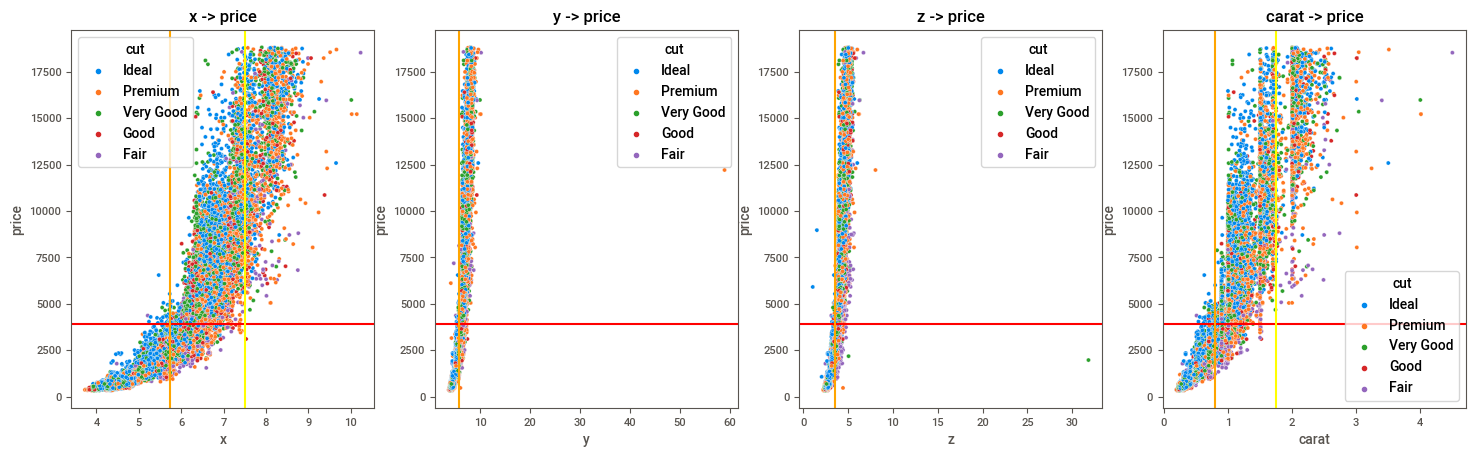

In [901]:
df=df[~((df['x']==0)|(df['y']==0)|(df['z']==0))]
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.scatterplot(df.x, df.price, hue = df.cut)
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.x.mean(), color = 'orange')
plt.axvline(7.5, color = 'yellow')
plt.title('x -> price')
plt.subplot(142)
sns.scatterplot(df.y, df.price, hue = df.cut, )
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.y.mean(), color = 'orange')
plt.title('y -> price')
plt.subplot(143)
sns.scatterplot(df.z, df.price, hue = df.cut)
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.z.mean(), color = 'orange')
plt.title('z -> price')
plt.subplot(144)
sns.scatterplot(df.carat, df.price, hue = df.cut)
plt.axhline(df.price.mean(), color = 'red')
plt.axvline(df.carat.mean(), color = 'orange')
plt.axvline(1.75, color = 'yellow')
plt.title('carat -> price')
plt.show()

In [916]:
pd.DataFrame(df.cut.value_counts())

,cut
Ideal,10805
Premium,6880
Very Good,6027
Good,2434
Fair,779


**Operations DVM102:**

    1. Rendering a scatterplot for each of the variables x, y, z, and carat with hue marked upon the cut of the gemstone. 
    
    2. Redering guide lines placed at the mean of each of the variables involved in the visualisation. 
    
    3. Checking for striking abnormalities such as a value of zero for any of the dimensions attributes or explanatory variables.
    
    4. Dropping any values that have a value of 0 attributed to any of the explanatory variables. 
    
    5. Rendering additional vertical lines to facilitate the visual segmentation of apparent clusters in x->price and carat -> price plots. 
    
    6. Total count of cut types have been displayed to assist with inference.
    

**Inference DVM102:**

**Fair, Good, Very Good, Premium, Ideal**

**BEST -------------------------> WORST**

    1. The reasoning behind choosing these variables specifically is that they are highly correlated in a positive fashion. This correlation was apparent in the Correlation section of this notebook where only 4 variables had a high correlation with price. Namely x, y, z, and carat, with correaltion above +0.90. This visualisation of bivariate and subsequently multivariate analysis brings this correlation to the forefront of the current investigation. 
    
    2. x : Length of the cubic zirconia in mm. This variable has a strong positive correlation with price. The trajectory of is steep overall but is significant in nature after the intersection of the means of price and x as shown in the visualisations above. Furthermore, the classification of the scatter plot pivoted on the cut of the gem displays that Ideal cuts even with shorter lenghts can be much highly priced than that of any other cut type. At instances these are even as highly priced as Good type cuts that are almost 1.5 times the length of the Ideal cuts. This claim can be presented the clustering of high priced Ideal cuts placed between the mean X line and the yellow line to the right of it. This investigation brings to light the importance of cuts type in determinig the price of the gem coupled with the gems length.
    
    3. y: Width of the cubic zirconia in mm. This variable has a coefficient correlation of +0.856 with price, the third strongest relationship with price in the list of variables. Here we do not see, especially visually, any major dependency on the cut type of the gem and its correlation with price and width. If insepcted closely one can notice a thin blue line to the left of the scatter structure, which does make minor claims of cut type affecting both the width and price of the gems. 
    
    4. z: Height of the cubic zirconia in mm. The distribution of this scatter plot is similar to that of the width. No major claims about the cut type on level of price or height, yet a hint of Ideal cut types having higher price compared to other as we see a collection of blue dots with a very low in height yet prices similar to other cut types that  are almost 2X in height. 
    
    5. carat: Carat weight of the cubic zirconia. Carat is depicts the heighest correlation with price as can be seen in the Correlation section of this notebook. This visualisation too demonstrates corresponding claims as that of the variables prior to it. Low carat Ideat cuts are almost as or much more expensive than any other cut type. We can see the big scatter of blue dots between the bands of the mean carat line and the positioned yellow line. Almost 70%-75% of the data points in the section below the mean intersection are of Ideal cut type, this further substantiates the importance of cut type in determining the price of the diamond even though carat has the highest correlation with price. 
    
    Assessing the implications of high correlations by categorical representation is essential to understand the role these categorical variables play in definig the explained variabled and values (price in this scenario). It is also important to harness the essence of multicollinearity and the to classify important variables in clustering or classification scenarios.

**DVM 103:**

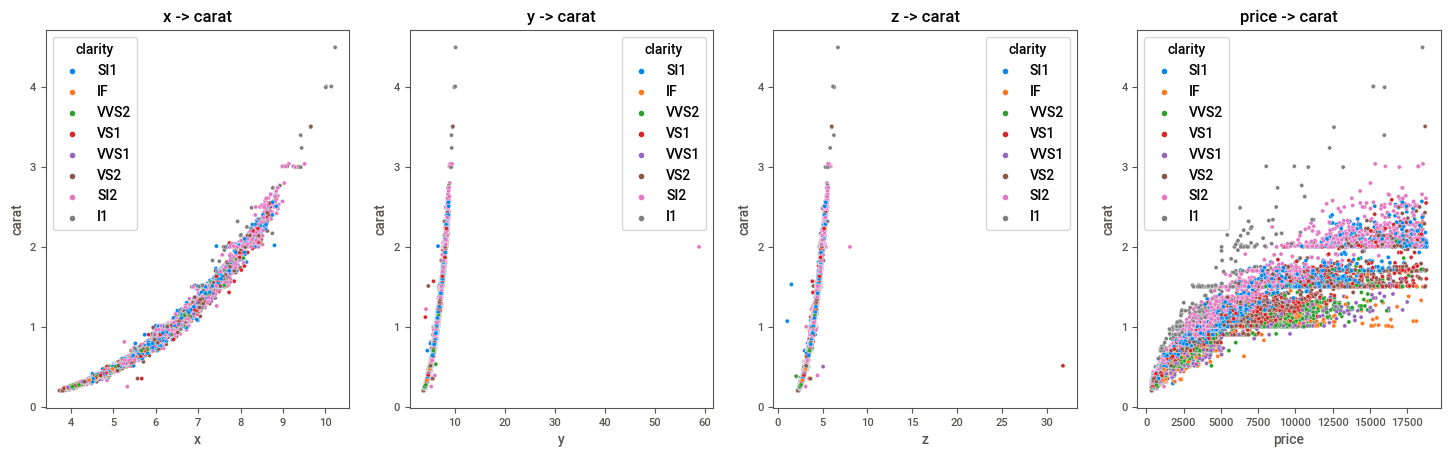

In [913]:
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.scatterplot(df.x, df.carat, hue = df.clarity)
plt.title('x -> carat')
plt.subplot(142)
sns.scatterplot(df.y, df.carat, hue = df.clarity)
plt.title('y -> carat')
plt.subplot(143)
sns.scatterplot(df.z, df.carat, hue = df.clarity)
plt.title('z -> carat')
plt.subplot(144)
sns.scatterplot(df.price, df.carat, hue = df.clarity)
plt.title('price -> carat')
plt.show()

In [917]:
pd.DataFrame(df.clarity.value_counts())

,clarity
SI1,6564
VS2,6092
SI2,4561
VS1,4086
VVS2,2530
VVS1,1839
IF,891
I1,362


**Operations DVM103:**

    1. Visualisation of the effects of x, y, z, and price on carat have been documented in the DVM103 visualisation. These effects have been categorised by fusing the type of clarity to the data points in the scatter plot. 
    
    2. Total count of the clarity types have been displayed to assist with infernece.


**Inference DVM103:**

**Clarity Type:**

**FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3**

**BEST --------------------------------------->WORST**

    1. x : Length of the cubic zirconia in mm. In the graph we spot maximum of SI1, VS2, and SI2 clarity types which are midrange clarity types. The prensence of the best clarity, IF, is minimal with traces of it towards the lower end of the plot, which can be interpreted as top quality clarity types may correspond to lower lenghts and carats. Whereas the most inferior clarity type in the dataset, I2, dominates the top segment of the scatter plot, here longer the cubic zirconia the more weight it will have. The relationship overall is positive with higher length measures corresponding to higher weights in carats. 
    
    2. y: Width of the cubic zirconia in mm. Similar to the previous plot of x, the mid range clarity dominates the central region of the plot whereas the superior clarities of IF, VVS1, and VS1 occupy the lower-middle section of the scatter plot. The upper region of the positive distribution is occupied by the inferior SI2 and I2 clarity types.
    
    3. z: Height of the cubic zirconia in mm. The trend continues onto the height of the gem stones. The lower clarity gems tend to occupy the region that correspong to more height and more weight in terms of carats. The superior clarity types again sit at the bottom of the scatterplot with lower heights and weights.
    
    4. Price: the Price of the cubic zirconia. The price and carat of the zirconia follow a trajectory similar to Log2x, with superior clarity VVS1, S1, and IF clustring the lower part of the scatter plot where as the inferior clarity VS2, SI1, SI2, I1 occupying the top. This graph shows a clear distinction and relationship between clarity type price and the carat of the cubic zirconia.

    In conclusion of this multivariate investigation, it can be said that superiror clarity stones tend to be of smaller dimensions and carat, and inferior clarity ones of higher dimensions and carats. Another claim that can be made on the price -> carat visualisation is that superior clarity are much highly price and weigh lesser than lower clarity type stones.

**SweetViz:**

In [91]:
report = sweetviz.analyze([df, 'Gem Prices'], target_feat='price')

                                             |          | [  0%]   00:00 -> (? left)

In [92]:
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
